In [57]:
import pandas as pd
import numpy as np
import sys, os
from haversine import haversine
import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [58]:
raw = pd.read_csv("C:\Itinerum GIS DATA\concordai-mtltrajet-interne\concordai-mtltrajet-interne\interne\coordinates-20_users.csv")

### Format Data 

In [59]:
raw.head()

,id,uuid,latitude,longitude,speed,h_accuracy,v_accuracy,point_type,code_rejet,end_of_trip,trip_id,trip_id_origine,timestamp,timestamp_txt
0,454870,da51987a-c43a-406b-a38c-54d8e83ee5df,45.427298,-73.598726,7.33584,8.0,0.0,-1,NaN,NaN,3372557,3263806.0,10/17/2016,2016-10-17T21:49:11-04
1,454871,da51987a-c43a-406b-a38c-54d8e83ee5df,45.427327,-73.599527,9.98204,6.0,0.0,-1,NaN,NaN,3372557,3263806.0,10/17/2016,2016-10-17T21:49:23-04
2,454872,da51987a-c43a-406b-a38c-54d8e83ee5df,45.427380,-73.601146,11.19460,4.0,0.0,-1,NaN,NaN,3372557,3263806.0,10/17/2016,2016-10-17T21:49:34-04
3,454873,da51987a-c43a-406b-a38c-54d8e83ee5df,45.427431,-73.602733,11.01160,6.0,0.0,-1,NaN,NaN,3372557,3263806.0,10/17/2016,2016-10-17T21:49:45-04
4,454874,da51987a-c43a-406b-a38c-54d8e83ee5df,45.427566,-73.604294,11.60520,6.0,0.0,-1,NaN,NaN,3372557,3263806.0,10/17/2016,2016-10-17T21:49:56-04


### Sort values based on the uuid and the timestamp 

In [60]:
raw = raw.sort_values(['uuid', 'timestamp','trip_id']) 


In [74]:
raw.drop(['h_accuracy','v_accuracy','point_type','code_rejet','end_of_trip','trip_id_origine','id'],axis=1,inplace=True)

### Convert to datetime

In [75]:
raw.timestamp = pd.to_datetime(raw.timestamp)

In [76]:
raw['timediff'] = raw.timestamp.diff().dt.seconds + 1   #Time difference is in seconds

In [77]:
raw['speeddiff'] = raw.speed.diff()                     # This will subtract the speed in postiion 2 - position 1

In [78]:
raw['acceleration'] = raw.speeddiff / raw.timediff     # divide the speed difference with the time difference to get the acceleration 

In [79]:
raw['accelerationdiff'] = raw.acceleration.diff()     # This will subtract the acceleration in position 2 - position 1 

In [80]:
raw['jerk'] = raw.accelerationdiff / raw.timediff    # Jerk (4th derivative of Transportation) 

In [81]:
raw.head()

,uuid,latitude,longitude,speed,trip_id,timestamp,timestamp_txt,timediff,speeddiff,acceleration,accelerationdiff,jerk,LL
1607,04f4c669-e099-487d-98b5-f14be075bef8,45.462746,-73.565170,2.392850,1453270,2016-10-18,2016-10-18T21:27:24-04,NaN,NaN,NaN,NaN,NaN,"(45.46274629, -73.56517)"
3477,04f4c669-e099-487d-98b5-f14be075bef8,45.462889,-73.565223,0.354735,1453308,2016-10-19,2016-10-19T04:01:35-04,1.0,-2.038115,-2.038115,NaN,NaN,"(45.46288888, -73.5652228)"
3478,04f4c669-e099-487d-98b5-f14be075bef8,45.462795,-73.565134,0.151239,1453308,2016-10-19,2016-10-19T04:01:38-04,1.0,-0.203496,-0.203496,1.834619,1.834619,"(45.46279454, -73.5651342)"
3479,04f4c669-e099-487d-98b5-f14be075bef8,45.500829,-73.559942,1.636630,1453318,2016-10-19,2016-10-19T09:14:52-04,1.0,1.485391,1.485391,1.688887,1.688887,"(45.50082948, -73.55994240000001)"
3480,04f4c669-e099-487d-98b5-f14be075bef8,45.500934,-73.559566,1.171020,1453318,2016-10-19,2016-10-19T09:15:07-04,1.0,-0.465610,-0.465610,-1.951001,-1.951001,"(45.50093357, -73.5595662)"


### Number of Unique UUIDs

### Converting the coordinate list into a float numpy array 

In [82]:
coordinates =  list(zip(raw.latitude, raw.longitude))
raw['LL'] = coordinates 
#raw.dtypes

In [83]:
raw.head()

,uuid,latitude,longitude,speed,trip_id,timestamp,timestamp_txt,timediff,speeddiff,acceleration,accelerationdiff,jerk,LL
1607,04f4c669-e099-487d-98b5-f14be075bef8,45.462746,-73.565170,2.392850,1453270,2016-10-18,2016-10-18T21:27:24-04,NaN,NaN,NaN,NaN,NaN,"(45.46274629, -73.56517)"
3477,04f4c669-e099-487d-98b5-f14be075bef8,45.462889,-73.565223,0.354735,1453308,2016-10-19,2016-10-19T04:01:35-04,1.0,-2.038115,-2.038115,NaN,NaN,"(45.46288888, -73.5652228)"
3478,04f4c669-e099-487d-98b5-f14be075bef8,45.462795,-73.565134,0.151239,1453308,2016-10-19,2016-10-19T04:01:38-04,1.0,-0.203496,-0.203496,1.834619,1.834619,"(45.46279454, -73.5651342)"
3479,04f4c669-e099-487d-98b5-f14be075bef8,45.500829,-73.559942,1.636630,1453318,2016-10-19,2016-10-19T09:14:52-04,1.0,1.485391,1.485391,1.688887,1.688887,"(45.50082948, -73.55994240000001)"
3480,04f4c669-e099-487d-98b5-f14be075bef8,45.500934,-73.559566,1.171020,1453318,2016-10-19,2016-10-19T09:15:07-04,1.0,-0.465610,-0.465610,-1.951001,-1.951001,"(45.50093357, -73.5595662)"


### Function to estimate the time of the day

In [84]:
def hours(x):
    if x>=11 and x<=13:
        return 'MR'             # Morning Rush
    elif x>=20 and x<=22:
        return 'NR'             #Night rush
    else:
        return 'S' #Stationary
        

In [85]:
raw['Hour'] = raw.timestamp.dt.hour #if the timestamp is of type datetime64, then can use the dt.hour function to extract the hour of the timestamp

In [86]:
raw['RushhourType'] = raw['Hour'].apply(hours)

In [87]:
raw.timestamp.min() # range of the timestamps presented in the dataframe

Timestamp('2016-10-17 00:00:00')

In [88]:
raw.timestamp.max() # range of the timestamps presented in the dataframe

Timestamp('2016-11-30 00:00:00')

### PublicTransportation closing hours

In [89]:
def closed_transit(x):
    if x >=5 and x<=9:
        return 1
    else:
        return 0

In [90]:
raw['ClosedTransit'] = raw.timestamp.dt.hour.apply(closed_transit)

In [91]:
raw.head()

,uuid,latitude,longitude,speed,trip_id,timestamp,timestamp_txt,timediff,speeddiff,acceleration,accelerationdiff,jerk,LL,Hour,RushhourType,ClosedTransit
1607,04f4c669-e099-487d-98b5-f14be075bef8,45.462746,-73.565170,2.392850,1453270,2016-10-18,2016-10-18T21:27:24-04,NaN,NaN,NaN,NaN,NaN,"(45.46274629, -73.56517)",0,S,0
3477,04f4c669-e099-487d-98b5-f14be075bef8,45.462889,-73.565223,0.354735,1453308,2016-10-19,2016-10-19T04:01:35-04,1.0,-2.038115,-2.038115,NaN,NaN,"(45.46288888, -73.5652228)",0,S,0
3478,04f4c669-e099-487d-98b5-f14be075bef8,45.462795,-73.565134,0.151239,1453308,2016-10-19,2016-10-19T04:01:38-04,1.0,-0.203496,-0.203496,1.834619,1.834619,"(45.46279454, -73.5651342)",0,S,0
3479,04f4c669-e099-487d-98b5-f14be075bef8,45.500829,-73.559942,1.636630,1453318,2016-10-19,2016-10-19T09:14:52-04,1.0,1.485391,1.485391,1.688887,1.688887,"(45.50082948, -73.55994240000001)",0,S,0
3480,04f4c669-e099-487d-98b5-f14be075bef8,45.500934,-73.559566,1.171020,1453318,2016-10-19,2016-10-19T09:15:07-04,1.0,-0.465610,-0.465610,-1.951001,-1.951001,"(45.50093357, -73.5595662)",0,S,0


### Segregating the Montreal Area into 4 parts

In [93]:
vals = [np.nan]
LL_col = pd.DataFrame()
LL_col['LL'] = raw.LL

print (LL_col['LL'][0])
    

(45.42729765, -73.5987258)


In [94]:
vals = [np.nan]
LL_col = pd.DataFrame()
LL_col['LL'] = raw.LL.as_matrix()
print (haversine(LL_col['LL'][0],LL_col['LL'][1]))

    

0.01638130728861159


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
vals = [np.nan]
LL_col = pd.DataFrame()
LL_col['LL'] = raw.LL.as_matrix()

for i in range(1, raw.shape[0]):
    
    pair1 = LL_col['LL'][i-1]
    pair2 = LL_col['LL'][i]
    val = (haversine(pair1,pair2,unit='km'))
    vals.append(val)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Weekday and Weekends 

In [96]:
raw['Distance'] = vals
print(raw.Distance.isnull().sum(axis = 0))

1


In [97]:
raw['Weekends'] = raw.timestamp.dt.day_name()
raw.Weekends = raw.Weekends.replace(to_replace=['Saturday','Sunday'], value=1)
raw.Weekends = raw.Weekends.replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday'], value=0)
raw.Weekends.value_counts()

0    69273
1    23381
Name: Weekends, dtype: int64

### Time of Day

In [98]:
def time_of_day(x):
    if x>= 10 and x<15:
        return 'morning'
    elif x>=15 and x<17:
        return 'lunch'
    elif x>=17 and x<21:
        return 'afternoon'
    elif x>=21 and x<=23:
        return 'evening'
    elif x>=0 and x<10:
        return 'night'
    else:
        return np.nan

raw['TimeOfDay'] = raw.Hour.apply(time_of_day)

In [99]:
raw.head()

,uuid,latitude,longitude,speed,trip_id,timestamp,timestamp_txt,timediff,speeddiff,acceleration,accelerationdiff,jerk,LL,Hour,RushhourType,ClosedTransit,Distance,Weekends,TimeOfDay
1607,04f4c669-e099-487d-98b5-f14be075bef8,45.462746,-73.565170,2.392850,1453270,2016-10-18,2016-10-18T21:27:24-04,NaN,NaN,NaN,NaN,NaN,"(45.46274629, -73.56517)",0,S,0,NaN,0,night
3477,04f4c669-e099-487d-98b5-f14be075bef8,45.462889,-73.565223,0.354735,1453308,2016-10-19,2016-10-19T04:01:35-04,1.0,-2.038115,-2.038115,NaN,NaN,"(45.46288888, -73.5652228)",0,S,0,0.016381,0,night
3478,04f4c669-e099-487d-98b5-f14be075bef8,45.462795,-73.565134,0.151239,1453308,2016-10-19,2016-10-19T04:01:38-04,1.0,-0.203496,-0.203496,1.834619,1.834619,"(45.46279454, -73.5651342)",0,S,0,0.012561,0,night
3479,04f4c669-e099-487d-98b5-f14be075bef8,45.500829,-73.559942,1.636630,1453318,2016-10-19,2016-10-19T09:14:52-04,1.0,1.485391,1.485391,1.688887,1.688887,"(45.50082948, -73.55994240000001)",0,S,0,4.248623,0,night
3480,04f4c669-e099-487d-98b5-f14be075bef8,45.500934,-73.559566,1.171020,1453318,2016-10-19,2016-10-19T09:15:07-04,1.0,-0.465610,-0.465610,-1.951001,-1.951001,"(45.50093357, -73.5595662)",0,S,0,0.031522,0,night


### Rough Features 

In [100]:
# Percentile function for the aggregation

def pct(x):
    return np.quantile(x,0.75)

In [106]:
raw.speed = raw.speed.astype(float)
groupby_list = ['uuid','trip_id']
temp = raw.groupby(test).agg({
    'speed' : [
        ('SpeedPct', pct),
        ('MaxSpeed', 'max'),
        ('STDSpeed', 'std'),
        ('MeanSpeed', 'mean')],
         'Weekends' : ['first'],
         'RushhourType': ['first'],
         'ClosedTransit' : ['first'],
         'TimeOfDay' : ['first'] 
})



In [107]:
temp.head()


speed                      \
                                              SpeedPct  MaxSpeed  STDSpeed   
uuid                                 trip_id                                 
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850  2.392850       NaN   
                                     1453308  0.303861  0.354735  0.143893   
                                     1453318  1.520228  1.636630  0.329236   
                                     1453327  0.185753  0.239540  0.152132   
                                     1453338  0.111510  0.111510       NaN   

                                                       Weekends RushhourType  \
                                             MeanSpeed    first        first   
uuid                                 trip_id                                   
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850        0            S   
                                     1453308  0.252987        0            S   
                                     1453318  1.403825        0            S   
                                     1453327  0.131967        0            S   
                                     1453338  0.111510        0            S   

                                             ClosedTransit TimeOfDay  
                                                     first     first  
uuid                                 trip_id                          
04f4c669-e099-487d-98b5-f14be075bef8 1453270             0     night  
                                     1453308             0     night  
                                     1453318             0     night  
                                     1453327             0     night  
                                     1453338             0     night

In [108]:
test = raw.groupby(groupby_list).sum()

df_temporary= pd.merge(temp,test['Distance'], on="uuid") # Dataframe of the trades taken by the model 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


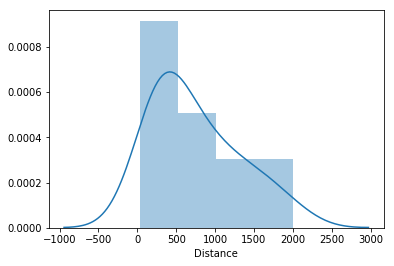

In [39]:
sns.distplot(df_temporary['Distance'])

In [109]:
def distance(x):
    if len(x) <= 1:
        return 0
    else:
        return np.sum(x[1:])

In [110]:
temp['TotalDistance'] = raw.groupby(groupby_list).apply(lambda x: distance(x['Distance'].values))

In [111]:
temp.head()

speed                      \
                                              SpeedPct  MaxSpeed  STDSpeed   
uuid                                 trip_id                                 
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850  2.392850       NaN   
                                     1453308  0.303861  0.354735  0.143893   
                                     1453318  1.520228  1.636630  0.329236   
                                     1453327  0.185753  0.239540  0.152132   
                                     1453338  0.111510  0.111510       NaN   

                                                       Weekends RushhourType  \
                                             MeanSpeed    first        first   
uuid                                 trip_id                                   
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850        0            S   
                                     1453308  0.252987        0            S   
                                     1453318  1.403825        0            S   
                                     1453327  0.131967        0            S   
                                     1453338  0.111510        0            S   

                                             ClosedTransit TimeOfDay  \
                                                     first     first   
uuid                                 trip_id                           
04f4c669-e099-487d-98b5-f14be075bef8 1453270             0     night   
                                     1453308             0     night   
                                     1453318             0     night   
                                     1453327             0     night   
                                     1453338             0     night   

                                             TotalDistance  
                                                            
uuid                                 trip_id                
04f4c669-e099-487d-98b5-f14be075bef8 1453270      0.000000  
                                     1453308      0.012561  
                                     1453318      0.031522  
                                     1453327      0.011467  
                                     1453338      0.000000

In [112]:
def pct(x):
    if len(x) <= 1:
        return 0
    else:
        return np.quantile(x[1:], 0.75)

In [113]:
temp['AccelPct'] = raw.groupby(groupby_list).apply(lambda x: pct(x['acceleration'].values))

In [114]:
def max_(x):
    if len(x) <= 1:
        return 0
    else:
        return max(x[1:])

In [115]:
temp['MaxAccel'] = raw.groupby(groupby_list).apply(lambda x: max_(x['acceleration'].values))

In [116]:
def STD(x):
    if len(x) <= 1:
        return 0
    else:
        return np.std(x[1:])

In [117]:
temp['STDAccel'] = raw.groupby(groupby_list).apply(lambda x: STD(x['acceleration'].values))

In [118]:
def mean(x):
    if len(x) <= 1:
        return 0
    else:
        return np.mean(x[1:])

In [119]:
temp['MeanAccel'] = raw.groupby(groupby_list).apply(lambda x: mean(x['acceleration'].values))

In [120]:
temp.head()

speed                      \
                                              SpeedPct  MaxSpeed  STDSpeed   
uuid                                 trip_id                                 
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850  2.392850       NaN   
                                     1453308  0.303861  0.354735  0.143893   
                                     1453318  1.520228  1.636630  0.329236   
                                     1453327  0.185753  0.239540  0.152132   
                                     1453338  0.111510  0.111510       NaN   

                                                       Weekends RushhourType  \
                                             MeanSpeed    first        first   
uuid                                 trip_id                                   
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850        0            S   
                                     1453308  0.252987        0            S   
                                     1453318  1.403825        0            S   
                                     1453327  0.131967        0            S   
                                     1453338  0.111510        0            S   

                                             ClosedTransit TimeOfDay  \
                                                     first     first   
uuid                                 trip_id                           
04f4c669-e099-487d-98b5-f14be075bef8 1453270             0     night   
                                     1453308             0     night   
                                     1453318             0     night   
                                     1453327             0     night   
                                     1453338             0     night   

                                             TotalDistance  AccelPct  \
                                                                       
uuid                                 trip_id                           
04f4c669-e099-487d-98b5-f14be075bef8 1453270      0.000000  0.000000   
                                     1453308      0.012561 -0.203496   
                                     1453318      0.031522 -0.465610   
                                     1453327      0.011467 -0.215147   
                                     1453338      0.000000  0.000000   

                                              MaxAccel STDAccel MeanAccel  
                                                                           
uuid                                 trip_id                               
04f4c669-e099-487d-98b5-f14be075bef8 1453270  0.000000      0.0  0.000000  
                                     1453308 -0.203496      0.0 -0.203496  
                                     1453318 -0.465610      0.0 -0.465610  
                                     1453327 -0.215147      0.0 -0.215147  
                                     1453338  0.000000      0.0  0.000000

In [121]:
temp['JerkPct'] = raw.groupby(groupby_list).apply(lambda x: pct(x['jerk'].values))

In [122]:
temp['MaxJerk'] = raw.groupby(groupby_list).apply(lambda x: max_(x['jerk'].values))

In [123]:
temp['STDJerk'] = raw.groupby(groupby_list).apply(lambda x: STD(x['jerk'].values))

In [124]:
temp['MeanJerk'] = raw.groupby(groupby_list).apply(lambda x: mean(x['jerk'].values))

In [125]:
temp.columns = ['SpeedPct', 'MaxSpeed', 'STDSpeed', 'MeanSpeed', 'Weekends', 'RushHourType', 'ClosedTransit', 'TimeOfDay', 'TotalDistance','AccelPct', 'MaxAccel', 'STDAccel', 'MeanAccel','JerkPct','MaxJerk','STDJerk','MeanJerk']

In [126]:
temp.head()

SpeedPct  MaxSpeed  STDSpeed  \
uuid                                 trip_id                                 
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850  2.392850       NaN   
                                     1453308  0.303861  0.354735  0.143893   
                                     1453318  1.520228  1.636630  0.329236   
                                     1453327  0.185753  0.239540  0.152132   
                                     1453338  0.111510  0.111510       NaN   

                                              MeanSpeed  Weekends  \
uuid                                 trip_id                        
04f4c669-e099-487d-98b5-f14be075bef8 1453270   2.392850         0   
                                     1453308   0.252987         0   
                                     1453318   1.403825         0   
                                     1453327   0.131967         0   
                                     1453338   0.111510         0   

                                             RushHourType  ClosedTransit  \
uuid                                 trip_id                               
04f4c669-e099-487d-98b5-f14be075bef8 1453270            S              0   
                                     1453308            S              0   
                                     1453318            S              0   
                                     1453327            S              0   
                                     1453338            S              0   

                                             TimeOfDay  TotalDistance  \
uuid                                 trip_id                            
04f4c669-e099-487d-98b5-f14be075bef8 1453270     night       0.000000   
                                     1453308     night       0.012561   
                                     1453318     night       0.031522   
                                     1453327     night       0.011467   
                                     1453338     night       0.000000   

                                              AccelPct  MaxAccel  STDAccel  \
uuid                                 trip_id                                 
04f4c669-e099-487d-98b5-f14be075bef8 1453270  0.000000  0.000000       0.0   
                                     1453308 -0.203496 -0.203496       0.0   
                                     1453318 -0.465610 -0.465610       0.0   
                                     1453327 -0.215147 -0.215147       0.0   
                                     1453338  0.000000  0.000000       0.0   

                                              MeanAccel   JerkPct   MaxJerk  \
uuid                                 trip_id                                  
04f4c669-e099-487d-98b5-f14be075bef8 1453270   0.000000  0.000000  0.000000   
                                     1453308  -0.203496  1.834619  1.834619   
                                     1453318  -0.465610 -1.951001 -1.951001   
                                     1453327  -0.215147  0.716333  0.716333   
                                     1453338   0.000000  0.000000  0.000000   

                                              STDJerk  MeanJerk  
uuid                                 trip_id                     
04f4c669-e099-487d-98b5-f14be075bef8 1453270      0.0  0.000000  
                                     1453308      0.0  1.834619  
                                     1453318      0.0 -1.951001  
                                     1453327      0.0  0.716333  
                                     1453338      0.0  0.000000

### Reset Index and output to a CSV

In [127]:
# This is done after the features have been created, need a column to aggregate the data, once this is done we can reset the index. 

temp.reset_index().to_csv('Rough_Featues.csv',index=False)

In [128]:
temp.head()

SpeedPct  MaxSpeed  STDSpeed  \
uuid                                 trip_id                                 
04f4c669-e099-487d-98b5-f14be075bef8 1453270  2.392850  2.392850       NaN   
                                     1453308  0.303861  0.354735  0.143893   
                                     1453318  1.520228  1.636630  0.329236   
                                     1453327  0.185753  0.239540  0.152132   
                                     1453338  0.111510  0.111510       NaN   

                                              MeanSpeed  Weekends  \
uuid                                 trip_id                        
04f4c669-e099-487d-98b5-f14be075bef8 1453270   2.392850         0   
                                     1453308   0.252987         0   
                                     1453318   1.403825         0   
                                     1453327   0.131967         0   
                                     1453338   0.111510         0   

                                             RushHourType  ClosedTransit  \
uuid                                 trip_id                               
04f4c669-e099-487d-98b5-f14be075bef8 1453270            S              0   
                                     1453308            S              0   
                                     1453318            S              0   
                                     1453327            S              0   
                                     1453338            S              0   

                                             TimeOfDay  TotalDistance  \
uuid                                 trip_id                            
04f4c669-e099-487d-98b5-f14be075bef8 1453270     night       0.000000   
                                     1453308     night       0.012561   
                                     1453318     night       0.031522   
                                     1453327     night       0.011467   
                                     1453338     night       0.000000   

                                              AccelPct  MaxAccel  STDAccel  \
uuid                                 trip_id                                 
04f4c669-e099-487d-98b5-f14be075bef8 1453270  0.000000  0.000000       0.0   
                                     1453308 -0.203496 -0.203496       0.0   
                                     1453318 -0.465610 -0.465610       0.0   
                                     1453327 -0.215147 -0.215147       0.0   
                                     1453338  0.000000  0.000000       0.0   

                                              MeanAccel   JerkPct   MaxJerk  \
uuid                                 trip_id                                  
04f4c669-e099-487d-98b5-f14be075bef8 1453270   0.000000  0.000000  0.000000   
                                     1453308  -0.203496  1.834619  1.834619   
                                     1453318  -0.465610 -1.951001 -1.951001   
                                     1453327  -0.215147  0.716333  0.716333   
                                     1453338   0.000000  0.000000  0.000000   

                                              STDJerk  MeanJerk  
uuid                                 trip_id                     
04f4c669-e099-487d-98b5-f14be075bef8 1453270      0.0  0.000000  
                                     1453308      0.0  1.834619  
                                     1453318      0.0 -1.951001  
                                     1453327      0.0  0.716333  
                                     1453338      0.0  0.000000